In [1]:
import spacy
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from google.colab import drive
import ast
import re
import spacy
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Load the SpaCy model
!pip install spacy --quiet
!python -m spacy download en_core_web_sm --quiet
nlp = spacy.load("en_core_web_sm")


drive.mount('/content/drive')

def load_csv_data(directory, filename):
    file_path = directory + filename
    return pd.read_csv(file_path)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 77.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#@title Loading datasets
directory = '/content/drive/My Drive/Schooling/Classes/USD/Summer 24/AAI Capstone/LLM Project/Data/'
application_train_file = 'train.csv'
df = load_csv_data(directory, application_train_file)

print(df.info())

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11118 entries, 0 to 11117
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   dialog   11118 non-null  object
 1   act      11118 non-null  object
 2   emotion  11118 non-null  object
dtypes: object(3)
memory usage: 260.7+ KB
None


,dialog,act,emotion
0,"['Say , Jim , how about going for a few beers ...",[3 4 2 2 2 3 4 1 3 4],[0 0 0 0 0 0 4 4 4 4]
1,"['Can you do push-ups ? '\n "" Of course I can ...",[2 1 2 2 1 1],[0 0 6 0 0 0]
2,"['Can you study with the radio on ? '\n ' No ,...",[2 1 2 1 1],[0 0 0 0 0]
3,['Are you all right ? '\n ' I will be all righ...,[2 1 1 1],[0 0 0 0]
4,"['Hey John , nice skates . Are they new ? '\n ...",[2 1 2 1 1 2 1 3 4],[0 0 0 0 0 6 0 6 0]


In [3]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
dialog     0
act        0
emotion    0
dtype: int64


In [4]:

# Correctly convert the 'dialog' column to a list of strings
def convert_dialog(dialog):
    # Remove the outer brackets and new lines
    dialog = dialog.replace('"', "'").replace('\n', '').replace('[', '').replace('\r', '').replace(']', ' ')

    # Split the string by the pattern of ending quotes followed by a space and starting quotes
    dialog_list = dialog.split(" ' ' ")
    #dialog_list = [d.strip().strip('"').strip("'") for d in dialog_list]
    dialog_list = [d.strip().lstrip("'") for d in dialog_list]
    return dialog_list

df['dialog'] = df['dialog'].apply(convert_dialog)

# Convert columns to lists
def convert_to_list(column):
    return column.apply(lambda x: ast.literal_eval(x.replace(' ', ', ')))

# Apply conversion to relevant columns
#df['dialog'] = df['dialog'].apply(ast.literal_eval)
df['act'] = convert_to_list(df['act'])
df['emotion'] = convert_to_list(df['emotion'])


In [5]:
# Verify the formatting is fixed
print("Sample 'act' column after formatting fix:")
print(df['act'].head())

print("Sample 'emotion' column after formatting fix:")
print(df['emotion'].head())

# Verify the conversion is correct
print("Sample 'dialog' column after converting to list of strings:")
print(df['dialog'][0])
print("Length of the first dialog:", len(df['dialog'][0]))

Sample 'act' column after formatting fix:
0    [3, 4, 2, 2, 2, 3, 4, 1, 3, 4]
1                [2, 1, 2, 2, 1, 1]
2                   [2, 1, 2, 1, 1]
3                      [2, 1, 1, 1]
4       [2, 1, 2, 1, 1, 2, 1, 3, 4]
Name: act, dtype: object
Sample 'emotion' column after formatting fix:
0    [0, 0, 0, 0, 0, 0, 4, 4, 4, 4]
1                [0, 0, 6, 0, 0, 0]
2                   [0, 0, 0, 0, 0]
3                      [0, 0, 0, 0]
4       [0, 0, 0, 0, 0, 6, 0, 6, 0]
Name: emotion, dtype: object
Sample 'dialog' column after converting to list of strings:
['Say , Jim , how about going for a few beers after dinner ?', 'You know that is tempting but is really not good for our fitness .', 'What do you mean ? It will help us to relax .', "Do you really think so ? I don't . It will just make us fat and act silly . Remember last time ?", "I guess you are right.But what shall we do ? I don't feel like sitting at home .", 'I suggest a walk over to the gym where we can play singsong and meet so

In [6]:
print(df['dialog'][1])
print("Length of the first dialog:", len(df['dialog'][1]))

['Can you do push-ups ?', "Of course I can . It's a piece of cake ! Believe it or not , I can do 30 push-ups a minute .", "Really ? I think that's impossible !", 'You mean 30 push-ups ?', 'Yeah !', "It's easy . If you do exercise everyday , you can make it , too . '"]
Length of the first dialog: 6


In [7]:
print(df['dialog'][2])
print("Length of the first dialog:", len(df['dialog'][2]))

['Can you study with the radio on ?', 'No , I listen to background music .', 'What is the difference ?', 'The radio has too many comerials .', "That's true , but then you have to buy a record player . '"]
Length of the first dialog: 5


In [8]:
# Validate the lengths
df['valid_length'] = df.apply(lambda row: len(row['dialog']) == len(row['act']) == len(row['emotion']), axis=1)

# Check if all rows have valid lengths
print("Number of rows with valid lengths:", df['valid_length'].sum())
print("Total number of rows:", len(df))

# Display some rows with invalid lengths if any
print("Rows with invalid lengths:")
print(df[df['valid_length'] == False])

Number of rows with valid lengths: 11111
Total number of rows: 11118
Rows with invalid lengths:
                                                 dialog  \
993   [Why do all girls appear feminine after sophom...   
4075  [So Peter , do you have a favorite comedy ?, W...   
4120  [What ?, What happened with that guy at the ca...   
4744  [Can we sit on the grass , darling ?, No , you...   
5176  [Jane ! What an enchanting skirt you have on !...   
6721  [This book I'm reading about Yoga is really in...   
7619  [In 1986 , a New Zealander Hackett popularized...   

                                       act  \
993            [2, 1, 1, 1, 2, 1, 1, 1, 1]   
4075                       [2, 1, 1, 1, 1]   
4120  [2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1]   
4744           [3, 4, 3, 4, 1, 2, 1, 2, 1]   
5176  [1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1]   
6721              [1, 1, 1, 2, 1, 2, 1, 1]   
7619                       [1, 1, 1, 1, 1]   

                                   emotion  valid_length  
993

In [9]:
# Drop rows with invalid lengths
df = df[df['valid_length'] == True].drop(columns=['valid_length'])

# Recheck if all remaining rows have valid lengths
df['valid_length'] = df.apply(lambda row: len(row['dialog']) == len(row['act']) == len(row['emotion']), axis=1)
print("Number of rows with valid lengths after dropping invalid rows:", df['valid_length'].sum())
print("Total number of rows after dropping invalid rows:", len(df))

# Drop the 'valid_length' column
df.drop(columns=['valid_length'], inplace=True)

Number of rows with valid lengths after dropping invalid rows: 11111
Total number of rows after dropping invalid rows: 11111


In [10]:
df.head()

,dialog,act,emotion
0,"[Say , Jim , how about going for a few beers a...","[3, 4, 2, 2, 2, 3, 4, 1, 3, 4]","[0, 0, 0, 0, 0, 0, 4, 4, 4, 4]"
1,"[Can you do push-ups ?, Of course I can . It's...","[2, 1, 2, 2, 1, 1]","[0, 0, 6, 0, 0, 0]"
2,"[Can you study with the radio on ?, No , I lis...","[2, 1, 2, 1, 1]","[0, 0, 0, 0, 0]"
3,"[Are you all right ?, I will be all right soon...","[2, 1, 1, 1]","[0, 0, 0, 0]"
4,"[Hey John , nice skates . Are they new ?, Yeah...","[2, 1, 2, 1, 1, 2, 1, 3, 4]","[0, 0, 0, 0, 0, 6, 0, 6, 0]"


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11111 entries, 0 to 11117
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   dialog   11111 non-null  object
 1   act      11111 non-null  object
 2   emotion  11111 non-null  object
dtypes: object(3)
memory usage: 347.2+ KB
None


Act counts mapped to labels:
{'directive': 14240, 'commissive': 8079, 'question': 24958, 'inform': 39833}
Emotion counts mapped to labels:
{'no emotion': 72087, 'happiness': 11179, 'surprise': 1599, 'fear': 146, 'disgust': 303, 'sadness': 969, 'anger': 827}


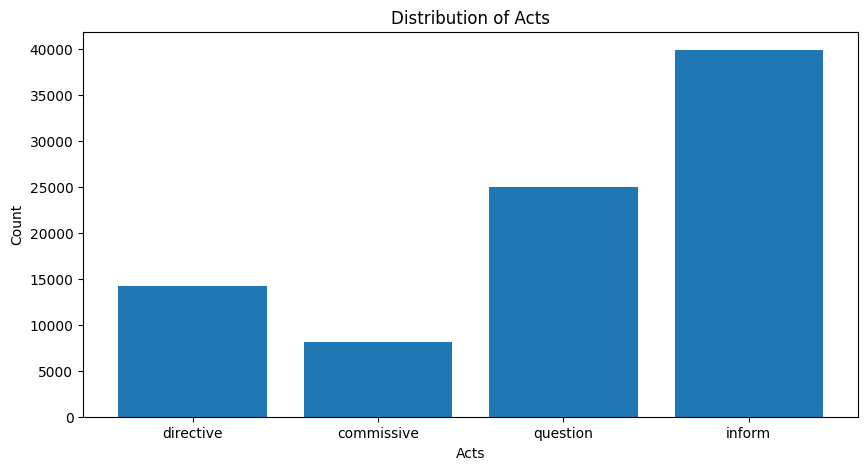

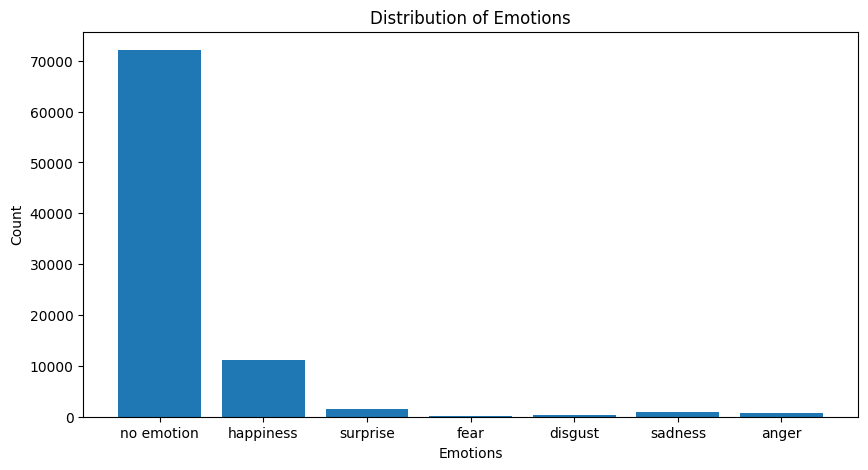

In [12]:
# Flatten the list of acts and emotions to get their distributions
acts = [act for sublist in df['act'] for act in sublist]
emotions = [emotion for sublist in df['emotion'] for emotion in sublist]

# Count the occurrences of each act and emotion
act_counts = Counter(acts)
emotion_counts = Counter(emotions)

# Map the labels to the counts
act_label = {
    "0": "__dummy__",
    "1": "inform",
    "2": "question",
    "3": "directive",
    "4": "commissive",
}

emotion_label = {
    "0": "no emotion",
    "1": "anger",
    "2": "disgust",
    "3": "fear",
    "4": "happiness",
    "5": "sadness",
    "6": "surprise",
}

act_counts_mapped = {act_label[str(k)]: v for k, v in act_counts.items()}
emotion_counts_mapped = {emotion_label[str(k)]: v for k, v in emotion_counts.items()}

print("Act counts mapped to labels:")
print(act_counts_mapped)

print("Emotion counts mapped to labels:")
print(emotion_counts_mapped)

# Visualize the distribution of acts
plt.figure(figsize=(10, 5))
plt.bar(act_counts_mapped.keys(), act_counts_mapped.values())
plt.title('Distribution of Acts')
plt.xlabel('Acts')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of emotions
plt.figure(figsize=(10, 5))
plt.bar(emotion_counts_mapped.keys(), emotion_counts_mapped.values())
plt.title('Distribution of Emotions')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.show()


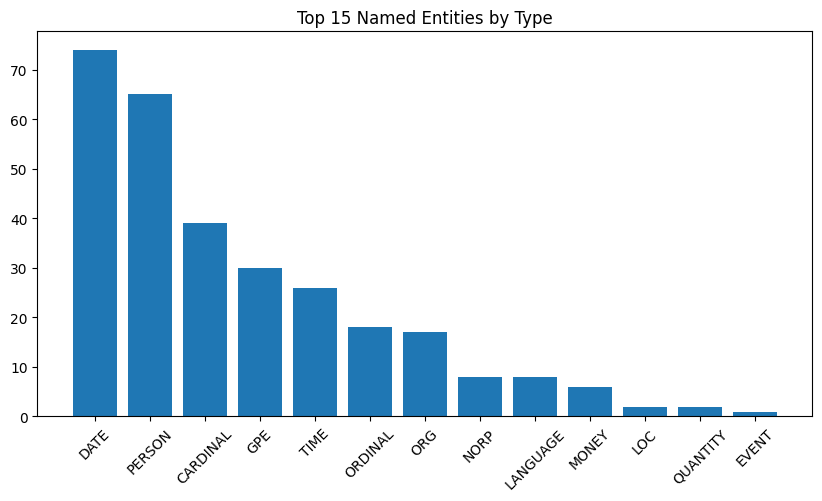

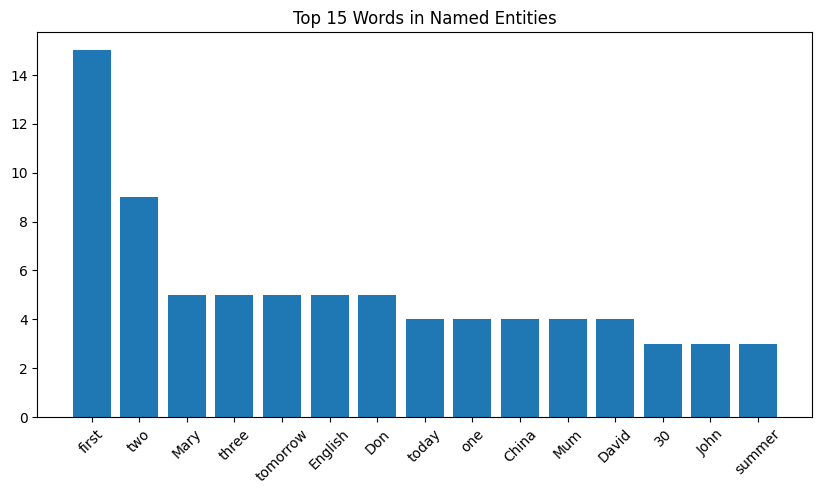

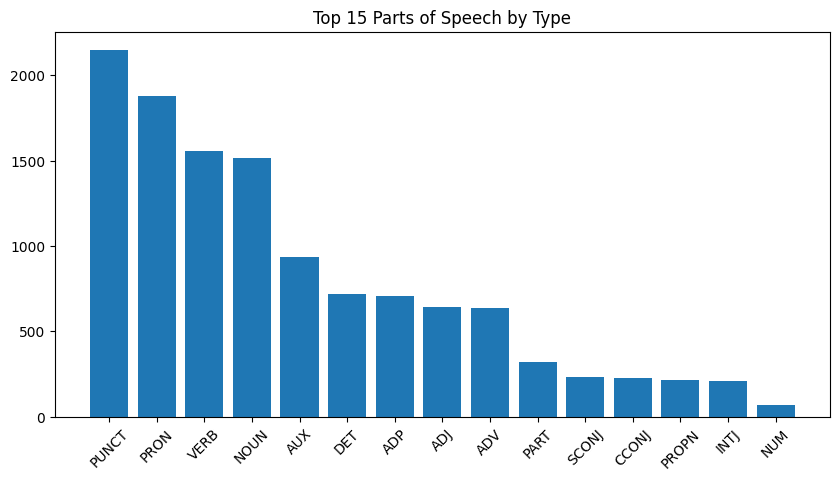

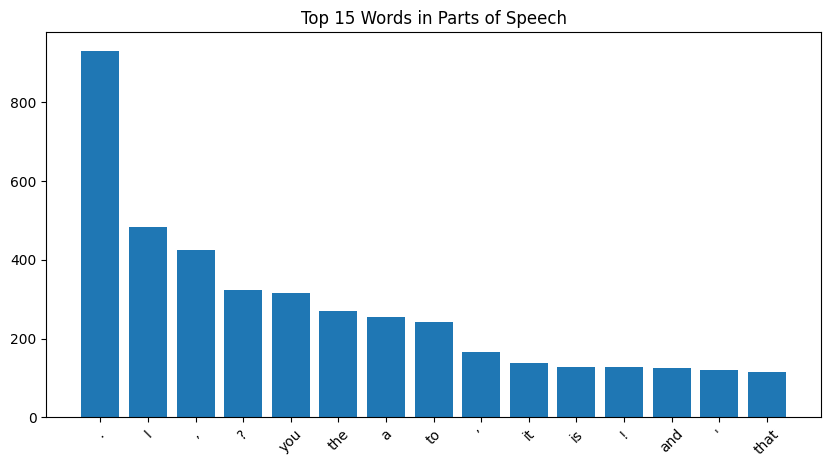

In [14]:
# Doing this on the entire dataset is computationally intensive; 1% below
num_rows = int(len(df) * 0.01)  # You can change this value to process a different number of rows

# Create a subset of the DataFrame
df_subset = df.iloc[:num_rows].copy()

# Preprocess the dialog (tokenization)
def preprocess(dialog):
    tokens = []
    for sentence in dialog:
        doc = nlp(sentence)
        tokens.extend([token.text for token in doc if token.text.isalpha()])
    return tokens

# Named Entity Recognition (NER)
def extract_entities(dialog):
    entities = []
    for sentence in dialog:
        doc = nlp(sentence)
        entities.extend([(ent.text, ent.label_) for ent in doc.ents])
    return entities

# Part-of-Speech (POS) Tagging
def pos_tagging(dialog):
    pos_tags = []
    for sentence in dialog:
        doc = nlp(sentence)
        pos_tags.extend([(token.text, token.pos_) for token in doc])
    return pos_tags

# Apply preprocessing and analysis to the dialog column for the subset
df_subset['processed_dialog'] = df_subset['dialog'].apply(preprocess)
df_subset['processed_dialog_str'] = df_subset['processed_dialog'].apply(' '.join)
df_subset['entities'] = df_subset['dialog'].apply(extract_entities)
df_subset['POS_tags'] = df_subset['dialog'].apply(pos_tagging)

# Visualization

# Top 15 Named Entities by Type
all_entities = [ent[1] for sublist in df_subset['entities'].tolist() for ent in sublist]
entity_freq = Counter(all_entities).most_common(15)
entity_keys, entity_values = zip(*entity_freq)

plt.figure(figsize=(10, 5))
plt.bar(entity_keys, entity_values)
plt.title('Top 15 Named Entities by Type')
plt.xticks(rotation=45)
plt.show()

# Top 15 Words in Named Entities
all_entities = [ent[0] for sublist in df_subset['entities'].tolist() for ent in sublist]
entity_freq = Counter(all_entities).most_common(15)
entity_keys, entity_values = zip(*entity_freq)

plt.figure(figsize=(10, 5))
plt.bar(entity_keys, entity_values)
plt.title('Top 15 Words in Named Entities')
plt.xticks(rotation=45)
plt.show()

# Top 15 Parts of Speech by Type
all_tags = [tag[1] for sublist in df_subset['POS_tags'].tolist() for tag in sublist]
tag_freq = Counter(all_tags).most_common(15)
tag_keys, tag_values = zip(*tag_freq)

plt.figure(figsize=(10, 5))
plt.bar(tag_keys, tag_values)
plt.title('Top 15 Parts of Speech by Type')
plt.xticks(rotation=45)
plt.show()

# Top 15 Words in Parts of Speech
all_tags = [tag[0] for sublist in df_subset['POS_tags'].tolist() for tag in sublist]
tag_freq = Counter(all_tags).most_common(15)
tag_keys, tag_values = zip(*tag_freq)

plt.figure(figsize=(10, 5))
plt.bar(tag_keys, tag_values)
plt.title('Top 15 Words in Parts of Speech')
plt.xticks(rotation=45)
plt.show()